# NumPy

## Inicializacion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ajuste de funciones polinomiales usando np.polyfit
Si simplemente necesitamos hacer ajustes basicos de polinomios, lo podemos hacer facilmente solo con <code>numpy</code>:

#### Ajuste polinomial de minimos cuadrados.
Ajuste un polinomio <code>p(x) = p[0] * x^deg + ... + p[deg]</code> de grados [deg] a los puntos (x, y). Devuelve un vector de coeficientes p que minimiza el error al cuadrado en el orden deg, deg-1, ..., 0.

* Crearemos unos datos para trabajar con ellos.

In [2]:
n = 50                                            # haremos 50 datos con ruido aleatorio
jitter_amp = 4.0                                  # esto es la amplitud del ruido
x = np.linspace(0,10,n)                           # generamos la variable x
jitter = jitter_amp * (np.random.random(n)-0.5)   # calculamos el ruido para cada dato
y = x + jitter                                    # calculamos el dato ruidoso

Ahora graficamos los datos ruidosos.

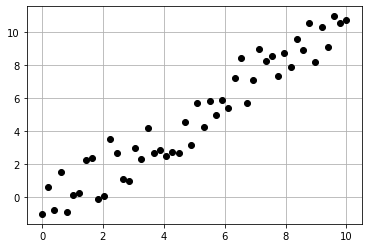

In [3]:
plt.plot(x, y, 'ok')
plt.grid()

### Ajuste con polyfit

Ahora estamos en condiciones de realizar el ajuste, utilizando la libreria <code>numpy</code> y de alli, la funcion de ajuste <code>polyfit</code>, la cual ajusta polinomios de grado n, np.polyfit(x, y, n).

In [4]:
a = np.polyfit(x, y, 1)    # el numero 1 significa que usaremos un polinomio de 1er grado
a

array([ 1.1690157 , -1.00605607])

## Observemos los resultados

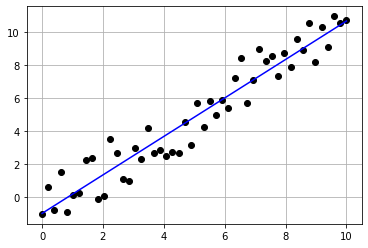

In [5]:
plt.plot(x, y, 'ok')
t = np.linspace(0, 10, n)
plt.plot(t, a[0]*t+a[1], 'b')
plt.grid()

### Veamos otro ejemplo

In [6]:
# Datos experimentales
x = np.array([0., 1., 2., 3., 4.])
y = np.array([10.2, 12.1, 15.5, 18.3, 20.6])

# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(x, y, 1)

print(p)

[2.7  9.94]


En este ejemplo <code>np.polyfit()</code> devuelve la lista de parametros p de la recta, por lo que el modelo lineal <code>f(x) = ax + b</code> de nuestros datos sera:

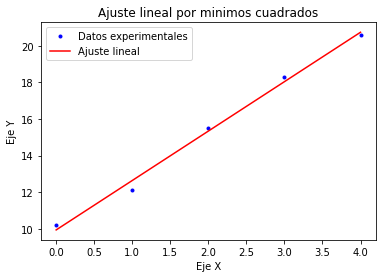

In [7]:
# Valores de y calculados del ajuste
y_ajuste = p[0]*x + p[1]

# Dibujamos los datos experimentales
p_datos = plt.plot(x, y, 'b.')
# Dibujamos la recta de ajuste
p_ajuste = plt.plot(x, y_ajuste, 'r-')

plt.title('Ajuste lineal por minimos cuadrados')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.legend(('Datos experimentales', 'Ajuste lineal'), loc="upper left")
plt.show()

Como se ve en este ejemplo,  la salida por defecto de <code>np.polyfit()</code> es un array con los parametros del ajuste. Sin embargo, si se pide una salida detallada con el parametro full=True (por defecto full=False), el resultado es una tupla con el array de parametros, el residuo, el rango, los valores singulares y la condicion relativa. Nos interesa especialmente el residuo del ajuste, que es la suma cuadratica de todos los residuos

$$∑_{i=1}^{n}|y_i−f(x_i)|^2$$

Para el ejemplo anterior tendriamos lo siguiente:

In [8]:
# Ajuste a una recta, con salida de datos
# print(x, y)
resultado = np.polyfit(x, y, 1, full=True)
"""
Imprime tupla
(array([ 2.7 ,  9.94]),                  Parámetros del ajuste
 array([ 0.472]),                        Suma de residuos
 2,                                      Rango de la matriz del sistema
 array([1.34777468, 0.42837299]),        Valores singulares
 1.1102230246251565e-15)                 rcond
"""
# Los parametros, el residuo, el rango, los valores singulares y la condicion relativa
print(resultado)

(array([2.7 , 9.94]), array([0.472]), 2, array([1.34777468, 0.42837299]), 1.1102230246251565e-15)


### <code>rcond</code>
El valor <code>rcond</code> no se trata realmente de la calidad del ajuste, sino describe el proceso mediante el cual se obtuvo el ajuste, es decir, una solucion de minimos cuadrados de un sistema lineal. Este valor se devuelve al usuario para su informacion.

<code>rcond</code> se utiliza para el truncamiento en matrices mal condicionadas. Corte para pequenos valores singulares. Los valores singulares menores o iguales a <code>rcond * greatest_singular_value</code> se establecen en cero.

<code>rcond opcional</code> Numero de condicion relativa del ajuste. Se ignoraran los valores singulares menores que este en relacion con el valor singular mas grande. El valor predeterminado es <code>len(x) * eps</code>, donde <code>eps</code> es la precicion relativa del tipo flotante, aproximadamente 2e-16 en la mayoria de los casos.

In [9]:
# Datos experimentales
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.95, 17.27, 86.07, 268.55, 603.72, 1233.62, 2393.58, 4229.55, 6689.21, 9550.65])

# Ajuste a una recta (polinomio de grado n)
n = 1
p = np.polyfit(x, y, n)

print(p)

[  971.85012121 -2837.65866667]


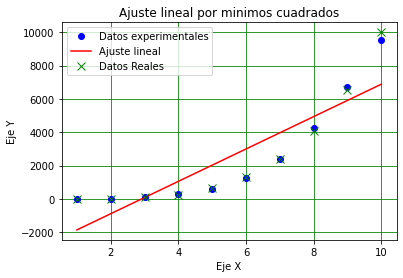

In [11]:
# Valores de y calculados del ajuste
if n == 4:
    y_ajuste = p[0] * x**4 + p[1] * x**3 + p[2] * x**2 + p[3] * x + p[4]
elif n == 3:
    y_ajuste = p[0] * x**3 + p[1] * x**2 + p[2] * x + p[3]
elif n == 2:
    y_ajuste = p[0] * x**2 + p[1] * x + p[2]
elif n == 1:
    y_ajuste = p[0] * x + p[1]
    
z_real = x**4+2
# Dibujamos los datos experimentales
p_datos = plt.plot(x, y, 'bo')
# Dibujamos la recta de ajuste
p_ajuste = plt.plot(x, y_ajuste, 'r-')
p_reales = plt.plot(x, z_real, 'gx', ms=8)

plt.title('Ajuste lineal por minimos cuadrados')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.legend(('Datos experimentales', 'Ajuste lineal', 'Datos Reales'), loc='upper left')
plt.grid()
plt.grid(b=True, color='g')
plt.show()